# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [3]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [4]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return x**2 * numpy.sin(x)

Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [10]:
def g(x):
    '''Analytical integral of f(x).'''
    return (2*x*numpy.sin(x)) - ((x**2 - 2)*numpy.cos(x)) -2

Check your solution with the same numpy array:

In [5]:
assert g(0) == 0.

In [6]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [9]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax) - g(xmin)

Check your analytic function:

In [8]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [5]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    if N == 1:
        return 1.6266126
    h=(xmax-xmin)/N
    k=0.0
    x=xmin + h
    for i in range(1, N//2 + 1):
        k += 4*f(x)
        x += 2*h

    x = xmin + 2*h
    for i in range(1, N//2):
        k += 2*f(x)
        x += 2*h
    return (h/3)*(f(xmin)+f(xmax)+k)

Make sure you have implemented Simpson's rule correctly:

In [6]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [7]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


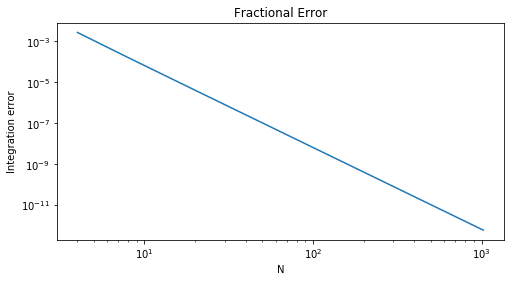

In [26]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
y_values = list()
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
for i in range(9):
    y_values.append(1 - (integrate_numeric(x0, x1, panel_counts[i]) / result_analytic))
plt.figure(figsize=(8, 4))
plt.plot(panel_counts, y_values)
plt.xlabel("N")
plt.ylabel("Integration error")
plt.title("Fractional Error")
plt.xscale('log')
plt.yscale('log')

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increasing the number of panels has the effect of improving the accuracy of the numerical method until N gets too large where numerical round-off issues start to occur at which point increasing the number of panels will no longer increase the accuracy any further and may even decrease the accuracy.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

Increasing the panel count with the trapezium rule would have the same effect as with Simpson's rule but to a lesser degree, i.e. the increase in accuracy by increasing the number of panels would be smaller using the trapezium rule than with Simpson's rule. This would be represented by a shallower gradient on the above graph for the trapezium rule.